# Assignment 3 Solution

This is the code solution to Assignment 3.  It is **not** written out at the same level of detail as I expect for an assignment submission.

## Setup

Let's import our Python packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from census import Census
from us import states

In [2]:
import seedbank

In [3]:
seedbank.initialize(20211019)
rng = seedbank.numpy_rng()

And set up our census API access:

In [4]:
c = Census('cf23a59a4baf3d5e93c239d3d05ce867d87395cb')

## State Info

Our first order of business is to get state poverty levels.  We're going to use the ACS5 files to get total (estimated) population and the estimated population under the poverty line:

In [5]:
state_pop = pd.DataFrame.from_records(c.acs5.state(('NAME', 'B05010_001E', 'B05010_002E'), '*', year=2014))
state_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         52 non-null     object 
 1   B05010_001E  52 non-null     float64
 2   B05010_002E  52 non-null     float64
 3   state        52 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.8+ KB


Now we want to clean up this data a bit, and compute the poverty rate (fraction in poverty):

In [6]:
state_pop.rename(columns={
    'B05010_001E': 'TotalHouseholds',
    'B05010_002E': 'HouseholdsBelowPoverty',
}, inplace=True)
state_pop['state'] = state_pop['state'].astype('i4')
state_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NAME                    52 non-null     object 
 1   TotalHouseholds         52 non-null     float64
 2   HouseholdsBelowPoverty  52 non-null     float64
 3   state                   52 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 1.5+ KB


In [7]:
state_pop['PovertyRate'] = state_pop['HouseholdsBelowPoverty'] / state_pop['TotalHouseholds']
state_pop.set_index('state', inplace=True)

What are the poverty rates of the various states?  We're going to actually show the data.  Remember — **always look at your data**.  In this case, it makes sense to view all the states; in some cases, we will want to only look at some of them, e.g. with `.head()`, or `.nlargest`.

In [8]:
state_pop

,NAME,TotalHouseholds,HouseholdsBelowPoverty,PovertyRate
state,,,,
1,Alabama,1048560.0,281052.0,0.268036
2,Alaska,179242.0,23963.0,0.133691
4,Arizona,1532525.0,385737.0,0.251700
5,Arkansas,663036.0,179070.0,0.270076
6,California,8778017.0,1945049.0,0.221582
8,Colorado,1184247.0,196514.0,0.165940
10,Delaware,192733.0,32257.0,0.167366
11,District of Columbia,100334.0,27183.0,0.270925
9,Connecticut,766701.0,103359.0,0.134810


What does the distribution of poverty rate look like? First numerically:

In [9]:
state_pop['PovertyRate'].describe()

count    52.000000
mean      0.207473
std       0.070696
min       0.110946
25%       0.153843
50%       0.196620
75%       0.247620
max       0.566731
Name: PovertyRate, dtype: float64

Graphically:

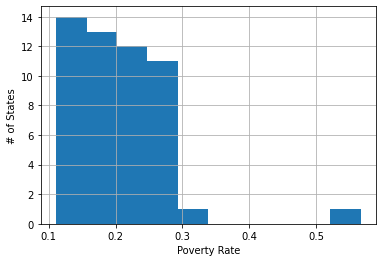

In [10]:
state_pop['PovertyRate'].hist()
plt.xlabel('Poverty Rate')
plt.ylabel('# of States')
plt.show()

Right skew, but in particular we have one state (or territory) with a much higher poverty rate than the others. What's that highest point? Let's look at the highest-poverty states:

In [11]:
state_pop.nlargest(3, 'PovertyRate')

,NAME,TotalHouseholds,HouseholdsBelowPoverty,PovertyRate
state,,,,
72,Puerto Rico,798753.0,452678.0,0.566731
28,Mississippi,692760.0,217394.0,0.313809
35,New Mexico,483625.0,140111.0,0.289710


## Infectious Diseases

Now we're going to connect these with infectious diseases.

First, let's load the file and see what it looks like:

In [12]:
sheets = pd.read_excel('../data/IHME_USA_COUNTY_INFECT_DIS_MORT_1980_2014_NATIONAL_Y2018M03D27.XLSX',
                       sheet_name=None, header=1, skipfooter=2)
sheets['Tuberculosis']

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
0,United States,NaN,"1.52 (1.44, 1.61)","1.26 (1.20, 1.31)","1.03 (0.98, 1.07)","0.78 (0.75, 0.81)","0.50 (0.48, 0.52)","0.34 (0.33, 0.36)","0.27 (0.26, 0.28)","0.25 (0.24, 0.27)","-83.31 (-84.50, -81.97)"
1,Alabama,1.0,"1.46 (1.33, 1.59)","1.41 (1.31, 1.51)","1.45 (1.36, 1.54)","1.20 (1.13, 1.27)","0.79 (0.74, 0.84)","0.53 (0.49, 0.57)","0.41 (0.37, 0.44)","0.36 (0.32, 0.39)","-75.63 (-78.45, -72.33)"
2,"Autauga County, Alabama",1001.0,"0.95 (0.68, 1.29)","1.01 (0.75, 1.35)","1.20 (0.91, 1.59)","0.94 (0.70, 1.23)","0.57 (0.41, 0.76)","0.40 (0.29, 0.55)","0.31 (0.21, 0.45)","0.31 (0.20, 0.44)","-67.31 (-78.44, -52.54)"
3,"Baldwin County, Alabama",1003.0,"0.84 (0.63, 1.12)","0.83 (0.65, 1.05)","0.83 (0.66, 1.05)","0.66 (0.52, 0.82)","0.41 (0.31, 0.53)","0.27 (0.20, 0.36)","0.21 (0.16, 0.29)","0.20 (0.14, 0.27)","-76.64 (-84.21, -66.06)"
4,"Barbour County, Alabama",1005.0,"1.11 (0.82, 1.48)","1.25 (0.95, 1.61)","1.41 (1.06, 1.80)","1.23 (0.93, 1.59)","0.83 (0.61, 1.09)","0.59 (0.42, 0.78)","0.44 (0.31, 0.61)","0.42 (0.28, 0.59)","-62.64 (-74.09, -44.50)"
...,...,...,...,...,...,...,...,...,...,...,...
3189,"Sweetwater County, Wyoming",56037.0,"0.61 (0.42, 0.89)","0.50 (0.35, 0.71)","0.48 (0.35, 0.65)","0.38 (0.28, 0.50)","0.22 (0.15, 0.30)","0.15 (0.10, 0.21)","0.11 (0.08, 0.17)","0.10 (0.07, 0.15)","-83.67 (-89.04, -76.32)"
3190,"Teton County, Wyoming",56039.0,"0.46 (0.31, 0.66)","0.39 (0.27, 0.54)","0.36 (0.26, 0.49)","0.30 (0.22, 0.40)","0.18 (0.13, 0.26)","0.13 (0.09, 0.18)","0.10 (0.07, 0.14)","0.09 (0.06, 0.13)","-80.31 (-86.42, -71.83)"
3191,"Uinta County, Wyoming",56041.0,"0.62 (0.39, 0.94)","0.54 (0.35, 0.82)","0.52 (0.35, 0.76)","0.42 (0.29, 0.60)","0.25 (0.16, 0.36)","0.17 (0.10, 0.25)","0.12 (0.07, 0.19)","0.11 (0.06, 0.17)","-82.22 (-88.76, -72.65)"
3192,"Washakie County, Wyoming",56043.0,"0.55 (0.36, 0.83)","0.48 (0.32, 0.71)","0.47 (0.33, 0.65)","0.38 (0.27, 0.53)","0.22 (0.14, 0.32)","0.15 (0.09, 0.22)","0.10 (0.06, 0.16)","0.09 (0.06, 0.15)","-83.14 (-89.31, -74.05)"


In [13]:
sheets.keys()

dict_keys(['Tuberculosis', 'HIV AIDS', 'Diarrheal diseases', 'Lower respiratory infections', 'Meningitis', 'Hepatitis'])

Now we're going to define a function that can get the table for a particular disease and year, converted to a number for computational usability:

In [15]:
def state_mortality(disease, year=2014):
    df = sheets[disease]
    df = df.loc[df['FIPS'] < 100, ['FIPS', f'Mortality Rate, {year}*']]
    df['Mortality'] = df.iloc[:, 1].str.replace(r'\s*\(.+\)', '', regex=True).astype('f8')
    return df

### Meningitis

Our first analysis is for meningitis:

In [17]:
mg = state_mortality('Meningitis')
mg.head()

,FIPS,"Mortality Rate, 2014*",Mortality
1,1.0,"0.58 (0.54, 0.64)",0.58
69,2.0,"0.43 (0.33, 0.56)",0.43
99,4.0,"0.43 (0.40, 0.47)",0.43
115,5.0,"0.52 (0.47, 0.58)",0.52
191,6.0,"0.31 (0.29, 0.33)",0.31


Let's peek at the distribution of meningitis mortality:

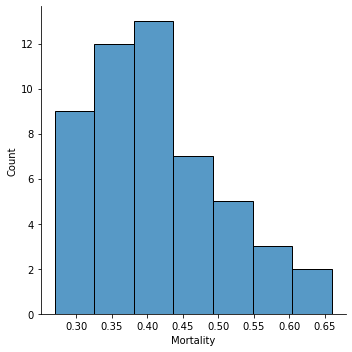

In [18]:
sns.displot(x='Mortality', data=mg)

In [38]:
mg['Mortality'].describe()

count    51.000000
mean      0.415490
std       0.091985
min       0.270000
25%       0.345000
50%       0.400000
75%       0.470000
max       0.660000
Name: Mortality, dtype: float64

How does meningitis mortality relate to poverty rate?

First, join the tables:

In [19]:
mg_pov = mg.join(state_pop, on='FIPS')
mg_pov.head()

,FIPS,"Mortality Rate, 2014*",Mortality,NAME,TotalHouseholds,HouseholdsBelowPoverty,PovertyRate
1,1.0,"0.58 (0.54, 0.64)",0.58,Alabama,1048560.0,281052.0,0.268036
69,2.0,"0.43 (0.33, 0.56)",0.43,Alaska,179242.0,23963.0,0.133691
99,4.0,"0.43 (0.40, 0.47)",0.43,Arizona,1532525.0,385737.0,0.251700
115,5.0,"0.52 (0.47, 0.58)",0.52,Arkansas,663036.0,179070.0,0.270076
191,6.0,"0.31 (0.29, 0.33)",0.31,California,8778017.0,1945049.0,0.221582


Now, a scatter plot:

<AxesSubplot:xlabel='PovertyRate', ylabel='Mortality'>

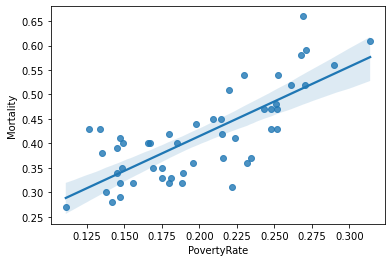

In [20]:
sns.regplot(x='PovertyRate', y='Mortality', data=mg_pov)

This looks positively correlated!

### Diarrheal diseases

In [23]:
dd = state_mortality('Diarrheal diseases')
dd.head()

,FIPS,"Mortality Rate, 2014*",Mortality
1,1.0,"2.41 (0.89, 2.70)",2.41
69,2.0,"1.34 (0.50, 1.78)",1.34
99,4.0,"2.55 (0.90, 2.89)",2.55
115,5.0,"2.02 (0.71, 2.31)",2.02
191,6.0,"2.21 (0.78, 2.45)",2.21


Always look at our outcome distributions:

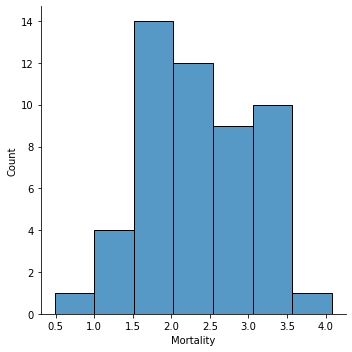

In [24]:
sns.displot(x='Mortality', data=dd)

In [25]:
dd.describe()

,FIPS,Mortality
count,51.000000,51.000000
mean,28.960784,2.356667
std,15.832828,0.714162
min,1.000000,0.490000
25%,16.500000,1.810000
50%,29.000000,2.310000
75%,41.500000,2.850000
max,56.000000,4.080000


And join and analyze:

<AxesSubplot:xlabel='PovertyRate', ylabel='Mortality'>

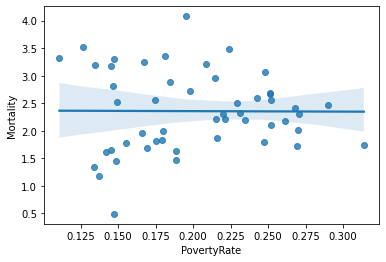

In [26]:
dd_pov = dd.join(state_pop, on='FIPS')
sns.regplot(x='PovertyRate', y='Mortality', data=dd_pov)

No discernible correlation.

## Correlations

Now we're going to compute correlations and bootstrapped confidence intervals.

I'm going to write a function to do this:

In [30]:
def correlation_boot_ci(data, xcol, ycol, NBOOT=10000):
    cor = data[xcol].corr(data[ycol])
    corrs = np.empty(NBOOT)
    for i in range(NBOOT):
        samp = data.sample(n=len(data), replace=True)
        corrs[i] = samp[xcol].corr(samp[ycol])
    return cor, np.quantile(corrs, [0.025, 0.975])

What does that look like for meningitis?

In [28]:
correlation_boot_ci(mg_pov, 'PovertyRate', 'Mortality')

(0.7666266512876152, array([0.62785306, 0.86208167]))

That is a reasonably strong correlation, and the confidence interval is pretty far away from zero.

And diarrehal diseases:

In [31]:
correlation_boot_ci(dd_pov, 'PovertyRate', 'Mortality')

(-0.005990448531004361, array([-0.28940933,  0.27710556]))

This reinforces (and quantifies) our previous observation that they do not seem correlated.

## Infant Mortality

Now we're going to get infant mortality data.

In [32]:
imort = pd.read_csv('../data/infant-mortality.csv')
imort.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2019,AL,7.89,449,/nchs/pressroom/states/alabama/al.htm
1,2019,AK,4.81,48,/nchs/pressroom/states/alaska/ak.htm
2,2019,AZ,5.24,429,/nchs/pressroom/states/arizona/az.htm
3,2019,AR,6.9,251,/nchs/pressroom/states/arkansas/ar.htm
4,2019,CA,4.06,1879,/nchs/pressroom/states/california/ca.htm


In [33]:
state_fips = pd.DataFrame.from_records(
    {'abbr': s.abbr, 'fips': int(s.fips)} for s in states.STATES_AND_TERRITORIES
)
state_fips.head()

,abbr,fips
0,AL,1
1,AK,2
2,AZ,4
3,AR,5
4,CA,6


In [34]:
imort = imort.join(state_fips.set_index('abbr'), on='STATE')
imort.head()

,YEAR,STATE,RATE,DEATHS,URL,fips
0,2019,AL,7.89,449,/nchs/pressroom/states/alabama/al.htm,1
1,2019,AK,4.81,48,/nchs/pressroom/states/alaska/ak.htm,2
2,2019,AZ,5.24,429,/nchs/pressroom/states/arizona/az.htm,4
3,2019,AR,6.9,251,/nchs/pressroom/states/arkansas/ar.htm,5
4,2019,CA,4.06,1879,/nchs/pressroom/states/california/ca.htm,6


In [35]:
mort_rate = imort['RATE'].copy()
mort_rate[mort_rate == 'Unreliable'] = None
imort['Mortality'] = mort_rate.astype('f4')

In [36]:
imort_pov = imort.join(state_pop, on='fips')
imort_pov = imort_pov[imort_pov['YEAR'] == 2014]
imort_pov.head()

,YEAR,STATE,RATE,DEATHS,URL,fips,Mortality,NAME,TotalHouseholds,HouseholdsBelowPoverty,PovertyRate
250,2014,AL,8.67,515,/nchs/pressroom/states/alabama.htm,1,8.67,Alabama,1048560.0,281052.0,0.268036
251,2014,AK,6.67,76,/nchs/pressroom/states/alaska.htm,2,6.67,Alaska,179242.0,23963.0,0.133691
252,2014,AZ,6.1,530,/nchs/pressroom/states/arizona.htm,4,6.10,Arizona,1532525.0,385737.0,0.251700
253,2014,AR,7.48,288,/nchs/pressroom/states/arkansas.htm,5,7.48,Arkansas,663036.0,179070.0,0.270076
254,2014,CA,4.32,2173,/nchs/pressroom/states/california.htm,6,4.32,California,8778017.0,1945049.0,0.221582


How are these related?

<AxesSubplot:xlabel='PovertyRate', ylabel='Mortality'>

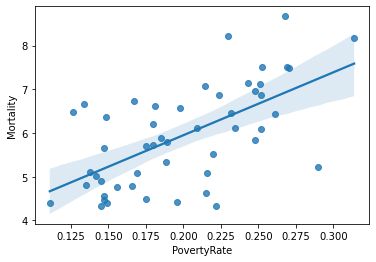

In [37]:
sns.regplot(x='PovertyRate', y='Mortality', data=imort_pov)

And what's that correlation look like?

In [38]:
correlation_boot_ci(imort_pov, 'PovertyRate', 'Mortality')

(0.6154666128728916, array([0.39738441, 0.78507225]))

Evidence for a significant correlation.